In [663]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [664]:
data=pd.read_csv("predictive_maintenance.csv")

In [665]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [666]:
data.shape

(10000, 10)

In [667]:
data.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [668]:
del data['UDI']
del data['Product ID']

In [669]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [670]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


<AxesSubplot:>

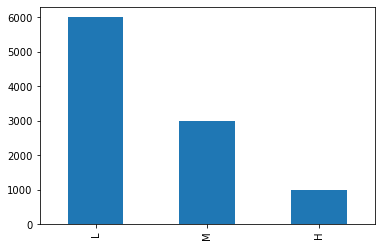

In [671]:
data['Type'].value_counts().plot(kind='bar')

<AxesSubplot:>

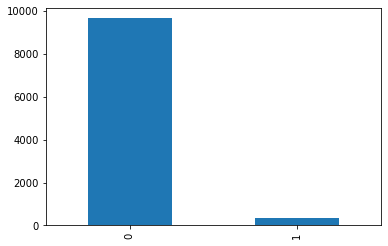

In [672]:
data['Target'].value_counts().plot(kind='bar')

In [673]:
X=data[['Type','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Failure Type']]
y=data[['Target']]


In [674]:
X.shape,y.shape

((10000, 7), (10000, 1))

In [675]:
X=X.values
y=y.values

In [676]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [677]:
#X.info()

In [678]:
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,6])], remainder='passthrough')

In [679]:
X=ct1.fit_transform(X)


In [680]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [681]:
# X.iloc[:,0] = le.fit_transform(X.iloc[:,0])
# print(X)

# X.iloc[:,6] = le.fit_transform(X.iloc[:,6])
# print(X)

In [682]:
y=y.reshape(-1,1)
y=le.fit_transform(y)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [683]:
#X=X.values

In [684]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [685]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [686]:
y_train=np.array(y_train)

In [687]:
#Oversampling 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_res, y_res = sm.fit_resample(X_train, y_train) 

#undersampling 
# from imblearn.under_sampling import NearMiss

# nm = NearMiss()
# X_res,y_res=nm.fit_sample(X_train,y_train)

In [688]:
X_res.shape,y_res.shape

((15460, 14), (15460,))

In [689]:
#y_res=y_res.reshape(1,-1)

In [690]:
X_res = sc.fit_transform(X_res)
X_test = sc.transform(X_test)

In [691]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_res, y_res)

SVC(random_state=0)

In [692]:
y_pred=classifier.predict(X_test)

In [693]:
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [694]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1931    0]
 [   4   65]]


0.998

In [695]:
recall_score(y_test,y_pred)

0.9420289855072463

In [696]:
precision_score(y_test,y_pred)

1.0

In [697]:
f1_score(y_test,y_pred)

0.9701492537313433